# ES 654 PreRequisite Test Solutions [Jinay Dagli: 20110084]

In [63]:
# Kindly run this cell to import all the important and required libraries
import numpy as np
import time
from jax import grad
import jax.numpy as jnp
from sympy.vector import gradient
import sympy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Question 1**

We know that a matrix of shape (n,k) when multiplied with a matrix of shape (k,m) results into an output matrix of shape (n, m). The row-elements of the former matrix are multiplied with the corresponding column elements of the latter matrix, hence resulting in knm number of multiplications [since there are nm number of total elements], and hence (k-1)nm number of additions.

**Question 2**

*Using list of lists* 

In [66]:
z = (input("Enter n,k,m values WITHOUT commas: ").split()) # # Enter the sizes of matrices without commas.
start = time.time() # For timing
n = int(z[0])
k = int(z[1])
m = int(z[2])
A = []
B = []
C = np.zeros((n,m)) # # Initialising the C matrix
A = np.random.randint(25, size=(n,k)) # # Matrices A and B filled with random integers lesser than 25!
B = np.random.randint(25, size=(k,m))
print(f'Matrix A:\n {A}')
print(f'Matrix B:\n {B}')
for i in range(n):
  for j in range(m):
    for l in range(k):
      C[i][j] += A[i][l] * B[l][j] # # The required Matrix multiplication
print(f"Resultant matrix C is:\n {C}")
end = time.time()
print(f"Time required by the code: {end-start}") # # The time required
  


Enter n,k,m values WITHOUT commas: 4 4 4
Matrix A:
 [[23 18 23 22]
 [17  1 10 24]
 [19  9  0  3]
 [ 2  1  1 17]]
Matrix B:
 [[21  5 13 15]
 [19 22 19 14]
 [ 6 10  9 15]
 [ 4 18 19 13]]
Resultant matrix C is:
 [[1051. 1137. 1266. 1228.]
 [ 532.  639.  786.  731.]
 [ 582.  347.  475.  450.]
 [ 135.  348.  377.  280.]]
Time required by the code: 0.0049130916595458984


*Using numpy*

In [67]:
z = (input("Enter n,k,m values without commas: ").split()) # # Enter the sizes of matrices without commas.
start = time.time() # For timing
n = int(z[0])
k = int(z[1])
m = int(z[2])
A = []
B = []
C = np.zeros((n,m)) # # Initialising the C matrix
A = np.random.randint(25, size=(n,k)) # # Matrices A and B filled with random integers lesser than 25!
B = np.random.randint(25, size=(k,m))
print(f'Matrix A:\n {A}')
print(f'Matrix B:\n {B}')
C = np.dot(A,B)
print(f"Resultant matrix C is:\n {C}")
end = time.time()
print(f"Time required by the code: {end-start}") # # The time required

Enter n,k,m values without commas: 4 4 4
Matrix A:
 [[20  5 10  4]
 [ 7 18  0  7]
 [16 18  2  6]
 [ 9  9 20 20]]
Matrix B:
 [[17  3  9  8]
 [ 1  5  7 19]
 [15 10 23 18]
 [ 0 12  1  8]]
Resultant matrix C is:
 [[495 233 449 467]
 [137 195 196 454]
 [320 230 322 554]
 [462 512 624 763]]
Time required by the code: 0.0042607784271240234


*Final Solution: (Comparing both the approaches)*

In [68]:
time_lists = 0 # # Variables to save the timings for the two approaches
time_act = 0
def dotpro_lists(A, B, C, n, k, m): # # Function for the lists approach
  start = time.time()
  for i in range(n):
    for j in range(m):
      for l in range(k):
        C[i][j] += A[i][l] * B[l][j]
  # print(f"Resultant matrix C is:\n {C}")
  end = time.time()
  # print(f"Time required by the code: {end-start}")
  return (end-start) 

def dotpro_inbuilt(A, B, C, n, k, m): # # Function for the in-built matrix mutliplication
  start = time.time()
  C = np.dot(A,B)
  # print(f"Resultant matrix C is:\n {C}")
  end = time.time()
  # print(f"Time required by the code: {end-start}")
  return (end-start)

z = (input("Enter n,k,m values without commas: ").split()) # # Enter the sizes of matrices without commas.
n = int(z[0])
k = int(z[1])
m = int(z[2])
A = []
B = []
C = np.zeros((n,m))
A = np.random.randint(25, size=(n,k))
B = np.random.randint(25, size=(k,m))

time_lists = 0
time_act = 0
for i in range(1000):
  time_lists += dotpro_lists(A,B,C,n,k,m)
  # print(time_lists)
  time_act += dotpro_inbuilt(A,B,C,n,k,m)
print(f"Time required by code when using lists: {time_lists/1000}")
print(f"Time required by code when using numpy: {time_act/1000}")

Enter n,k,m values without commas: 4 4 4
Time required by code when using lists: 7.714033126831055e-05
Time required by code when using numpy: 2.410888671875e-06


**Question 3**

If the given algorithm is followed, we know that we would find the median of the array after $n^2/2$ passes through the array, that is, O($n^2$). Another efficient way to find the median is to sort the array (sorting is O(nlog(n))).

In [69]:
n = int(input("Enter the size of the array:")) # # Declaring the size of the array
A = []
# print(A)

# # Defining the function for calculation of in-built median
def inbuilt_med(A):
  start = time.time()     # # O(n)
  # print(np.median(A))
  end = time.time()
  return (end-start)

# # Defining the function for calculating the median using given algorithm
def given_med(A):
  start = time.time()
  B = list(A)             # # O(n^2)
  J = []
  if(n%2 == 1):
    while(len(B)>n//2):
      j = 0
      for i in B:
        if(i>j):
          j = i
      B.remove(j)
      J.append(j)
    med = J[-1]

  else:
    while(len(B)>=n/2):
      j = 0
      for i in B:
        if(i>j):
          j = i
      B.remove(j)
      J.append(j)
    med = (J[-1]+J[-2])/2
  end = time.time()
  return (end-start)

# # Defining the function for finding median using sorting
def sort_med(A):
  start = time.time()
  A.sort()        # # O(nlogn)
  end = time.time()
  return (end-start)

time_inb = 0
time_given = 0
time_sort = 0
for i in range(1000):
  A = np.random.randint(25,size=(n)) 
  time_inb += inbuilt_med(A)
  time_given += given_med(A)
  time_sort += sort_med(A)

print(f"Time for in-built median function: {time_inb/1000}")
print(f"Time for median using given algo: {time_given/1000}")
print(f"Time for median function using sorting algo: {time_sort/1000}")


Enter the size of the array:5
Time for in-built median function: 1.6641616821289061e-07
Time for median using given algo: 5.397796630859375e-06
Time for median function using sorting algo: 8.828639984130859e-07


**Question 4**

We know that the gradient of a function f with respect to x is given by $\frac{\partial{f}}{\partial{x}}$. Hence, the gradient of the given function would be:

*with respect to x:* $2xy + y^3cos(x)$.

*with respect to y:* $x^2 + 3y^2sin(x)$.

**Question 5**

In [70]:
def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x) # # The given function

x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [1.0, 2.0, 3.0, 4.0, 5.0] # # Checking the gradient for some random values of x and y
df_dxy = grad(f)
d = []
for i in x:
  for j in y:
    d.append(df_dxy(i,j))

print(d)

[DeviceArray(2.5403023, dtype=float32, weak_type=True), DeviceArray(8.322418, dtype=float32, weak_type=True), DeviceArray(20.588161, dtype=float32, weak_type=True), DeviceArray(42.579346, dtype=float32, weak_type=True), DeviceArray(77.53778, dtype=float32, weak_type=True), DeviceArray(3.5838532, dtype=float32, weak_type=True), DeviceArray(4.670825, dtype=float32, weak_type=True), DeviceArray(0.7640352, dtype=float32, weak_type=True), DeviceArray(-10.633398, dtype=float32, weak_type=True), DeviceArray(-32.018356, dtype=float32, weak_type=True), DeviceArray(5.0100074, dtype=float32, weak_type=True), DeviceArray(4.08006, dtype=float32, weak_type=True), DeviceArray(-8.729797, dtype=float32, weak_type=True), DeviceArray(-39.35952, dtype=float32, weak_type=True), DeviceArray(-93.74906, dtype=float32, weak_type=True), DeviceArray(7.3463564, dtype=float32, weak_type=True), DeviceArray(10.770851, dtype=float32, weak_type=True), DeviceArray(6.3516235, dtype=float32, weak_type=True), DeviceArray(

**Question 6**

In [71]:
x,y = sympy.symbols('x, y') # # Declaring the sympy symbols
f = (x**2)*y + (y**3)*sympy.sin(x)
for i in [x,y]:
  print(sympy.simplify(f.diff(i))) # # Partial derivatives (or gradients) using sympy

y*(2*x + y**2*cos(x))
x**2 + 3*y**2*sin(x)


**Question 7**

In [72]:
# # The data shown in the question can be represented as follows:
master_dict = {
    "2022":{
        "Branch 1": {
            "Roll No.": [], "Name": [], "Marks":{
                "Maths": "x", "English": "y"
            } 
        },
        "Branch 2":{}
    },
    "2023":{"Branch 1": {},
        "Branch 2":{}
    },
    "2024":{"Branch 1": {},
        "Branch 2":{}
    },
    "2025":{"Branch 1": {},
        "Branch 2":{}
    }
}

print(master_dict)

{'2022': {'Branch 1': {'Roll No.': [], 'Name': [], 'Marks': {'Maths': 'x', 'English': 'y'}}, 'Branch 2': {}}, '2023': {'Branch 1': {}, 'Branch 2': {}}, '2024': {'Branch 1': {}, 'Branch 2': {}}, '2025': {'Branch 1': {}, 'Branch 2': {}}}


**Question 8**

In [73]:
class Overall: # # The main database (containing the sub-databases)
  def __init__(self, year):
    self.year = year

class Year: # # The database of Years containing the Branches
  def __init__(self, branches):
    self.branches = branches

class Branch: # # The database of branches, each having a name and the students
  def __init__(self, name, students):
    self.name = name
    self.students = students

class Student: # # The database of each student containing the name, roll number and marks
  def __init__(self, name, roll, marks):
    self.name = name
    self.roll = roll
    self.marks = marks


**Question 9**

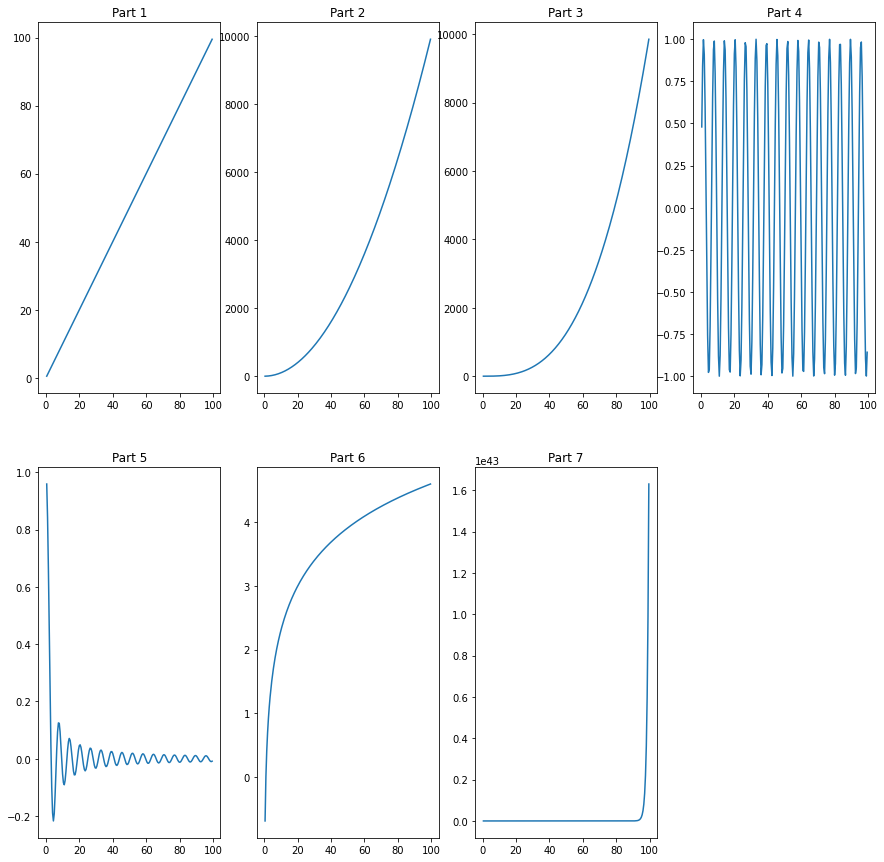

In [74]:
x = np.arange(0.5, 100, 0.5) # # Specifying the given range and steps
y = [0]*7
y[0] = x
y[1] = np.power(x,2)
y[2] = np.divide(np.power(x,3),100)
y[3] = np.sin(x)
y[4] = np.divide(np.sin(x),x)
y[5] = np.log(x)
y[6] = np.exp(x)
plt.figure(figsize=(15, 15))
for i in range(1,8): # # Plotting all as sub-plots at once!
  plt.subplot(2,4,i)
  plt.plot(x, y[i-1])
  plt.title(f"Part {i}")
plt.show()

**Question 10**

In [75]:
A = np.random.uniform(low = 1, high = 2, size = (20, 5))
print(A) # # Forming the uniformly-distributed elements containing matrix

[[1.79349655 1.82605772 1.31650418 1.18654446 1.51040363]
 [1.76174236 1.9839186  1.74844608 1.73224365 1.63351765]
 [1.34595786 1.77056168 1.3533776  1.03896889 1.3080707 ]
 [1.33580622 1.89750612 1.6182936  1.27099544 1.1395356 ]
 [1.69760664 1.11520402 1.43668532 1.44576816 1.95011997]
 [1.64088668 1.96085856 1.37351652 1.26275633 1.36228125]
 [1.7140414  1.26166898 1.49569684 1.65038069 1.68319399]
 [1.94319344 1.08466385 1.06461499 1.50759923 1.66593671]
 [1.65032422 1.65420569 1.14691786 1.73717238 1.14674201]
 [1.98530465 1.86884606 1.64973245 1.86689053 1.83975745]
 [1.25992707 1.88586601 1.11765099 1.06806986 1.49960538]
 [1.88272352 1.88659487 1.18329861 1.48363603 1.96196233]
 [1.51341663 1.58802948 1.77130677 1.08867672 1.30842374]
 [1.10771063 1.31026741 1.90849484 1.20462689 1.80792278]
 [1.71652534 1.46707677 1.03085804 1.68115843 1.35212306]
 [1.69325411 1.51063893 1.21299504 1.67478305 1.84788981]
 [1.88844471 1.21017408 1.87122105 1.22659525 1.3971444 ]
 [1.72218881 1

In [76]:
df = pd.DataFrame(data = A, columns = ['a', 'b', 'c', 'd', 'e'])
print(df) # # Creating the dataframe

           a         b         c         d         e
0   1.793497  1.826058  1.316504  1.186544  1.510404
1   1.761742  1.983919  1.748446  1.732244  1.633518
2   1.345958  1.770562  1.353378  1.038969  1.308071
3   1.335806  1.897506  1.618294  1.270995  1.139536
4   1.697607  1.115204  1.436685  1.445768  1.950120
5   1.640887  1.960859  1.373517  1.262756  1.362281
6   1.714041  1.261669  1.495697  1.650381  1.683194
7   1.943193  1.084664  1.064615  1.507599  1.665937
8   1.650324  1.654206  1.146918  1.737172  1.146742
9   1.985305  1.868846  1.649732  1.866891  1.839757
10  1.259927  1.885866  1.117651  1.068070  1.499605
11  1.882724  1.886595  1.183299  1.483636  1.961962
12  1.513417  1.588029  1.771307  1.088677  1.308424
13  1.107711  1.310267  1.908495  1.204627  1.807923
14  1.716525  1.467077  1.030858  1.681158  1.352123
15  1.693254  1.510639  1.212995  1.674783  1.847890
16  1.888445  1.210174  1.871221  1.226595  1.397144
17  1.722189  1.229565  1.957078  1.967599  1.

In [77]:
columns = ['a', 'b', 'c', 'd', 'e']
col = ''
stddev= 0
for i in columns:
  if(df[i].std()>stddev):
    stddev = df[i].std()
    col = i
print(col)  # # Prints the column with the highest standard deviation

b


In [78]:
df['Mean'] = df[['a', 'b', 'c', 'd', 'e']].mean(axis=1)
# print(df['Mean'])
index = df['Mean'].idxmin()
print(f'Index of row with minimum mean: {index}') # # Prints the row with minimum mean

Index of row with minimum mean: 18


**Question 11**

In [79]:
df['f'] = df['a'] + df['b'] + df['c']+ df['d'] + df['e'] # # Forms the required new column
print(df)

           a         b         c         d         e      Mean         f
0   1.793497  1.826058  1.316504  1.186544  1.510404  1.526601  7.633007
1   1.761742  1.983919  1.748446  1.732244  1.633518  1.771974  8.859868
2   1.345958  1.770562  1.353378  1.038969  1.308071  1.363387  6.816937
3   1.335806  1.897506  1.618294  1.270995  1.139536  1.452427  7.262137
4   1.697607  1.115204  1.436685  1.445768  1.950120  1.529077  7.645384
5   1.640887  1.960859  1.373517  1.262756  1.362281  1.520060  7.600299
6   1.714041  1.261669  1.495697  1.650381  1.683194  1.560996  7.804982
7   1.943193  1.084664  1.064615  1.507599  1.665937  1.453202  7.266008
8   1.650324  1.654206  1.146918  1.737172  1.146742  1.467072  7.335362
9   1.985305  1.868846  1.649732  1.866891  1.839757  1.842106  9.210531
10  1.259927  1.885866  1.117651  1.068070  1.499605  1.366224  6.831119
11  1.882724  1.886595  1.183299  1.483636  1.961962  1.679643  8.398215
12  1.513417  1.588029  1.771307  1.088677  1.30842

In [80]:
df['g'] = np.ndarray(shape=(20)) # # The required column g
for i in range(20):
  if(df.f[i]<8):
    df.g[i] = 'LT8'
  else:
    df.g[i] = 'GT8'
print(df)

           a         b         c         d         e      Mean         f    g
0   1.793497  1.826058  1.316504  1.186544  1.510404  1.526601  7.633007  LT8
1   1.761742  1.983919  1.748446  1.732244  1.633518  1.771974  8.859868  GT8
2   1.345958  1.770562  1.353378  1.038969  1.308071  1.363387  6.816937  LT8
3   1.335806  1.897506  1.618294  1.270995  1.139536  1.452427  7.262137  LT8
4   1.697607  1.115204  1.436685  1.445768  1.950120  1.529077  7.645384  LT8
5   1.640887  1.960859  1.373517  1.262756  1.362281  1.520060  7.600299  LT8
6   1.714041  1.261669  1.495697  1.650381  1.683194  1.560996  7.804982  LT8
7   1.943193  1.084664  1.064615  1.507599  1.665937  1.453202  7.266008  LT8
8   1.650324  1.654206  1.146918  1.737172  1.146742  1.467072  7.335362  LT8
9   1.985305  1.868846  1.649732  1.866891  1.839757  1.842106  9.210531  GT8
10  1.259927  1.885866  1.117651  1.068070  1.499605  1.366224  6.831119  LT8
11  1.882724  1.886595  1.183299  1.483636  1.961962  1.679643  

In [81]:
# # Checking the number of GT8's and LT8's
count = 0
for i in range(20):
  if(df.g[i] == 'LT8'):
    count += 1
print(f'Number of rows having the value LT8 is: {count}')

Number of rows having the value LT8 is: 16


In [82]:
LT8 = []
GT8 = []
for i in range(20):
  if(df.g[i] == 'LT8'):
    LT8.append(i)
  else:
    GT8.append(i)
print(f'Std dev for columns when value in g is LT8 is: {np.std(LT8)}') # # Standard dev of columns when g is LT8
print(f'Std dev for columns when value in g is GT8 is: {np.std(GT8)}') # # Standard dev of columns when g is GT8


Std dev for columns when value in g is LT8 is: 5.588772226527039
Std dev for columns when value in g is GT8 is: 6.4031242374328485


**Question 12**

In [83]:
# Without broadcasting
print('Without broadcasting:')
A = np.array([1, 2, 3, 4])
B = np.array([100, 100, 100, 100])
print(f'Matrix A: {A}')
print(f'Matrix B: {B}')
C = A + B
print(f'Sum matrix: {C}')

print('-----------------------------')
# With broadcasting
print('With broadcasting:')
A = np.array([1, 2, 3, 4])
B = 100
print(f'Matrix A: {A}')
print(f'B: {B}')
C = A + B
print(f'Sum matrix: {C}')

Without broadcasting:
Matrix A: [1 2 3 4]
Matrix B: [100 100 100 100]
Sum matrix: [101 102 103 104]
-----------------------------
With broadcasting:
Matrix A: [1 2 3 4]
B: 100
Sum matrix: [101 102 103 104]


**Question 13**

In [84]:
A = np.random.randint(25, size=(25)) # # Creating the random matrix
print(A)
temp = 25 # # Setting the temporary variable to the max possible value
ans = 0
for i in range(len(A)):
  if(A[i] < temp):
    temp = A[i]
    ans = i
print(f'Index of the minimum entry:{ans}') # # Defined the equivalent argmin function



[ 3  7  7 16  4 24 11  1  0 15 23 18 19 22  2 12  0 16  9 24  5 23  8 19
 11]
Index of the minimum entry:8


In [86]:
# # In-Built Argmin
print(f'Index of the minimum entry: {np.argmin(A, axis=0)}')

Index of the minimum entry: 8
